Instalasi

In [2]:
!pip install d2l==0.17.2

     |████████████████████████████████| 82 kB 497 kB/s 
     |████████████████████████████████| 9.9 MB 49.4 MB/s 
     |████████████████████████████████| 61 kB 5.6 MB/s 
     |████████████████████████████████| 11.6 MB 68.9 MB/s 
     |████████████████████████████████| 20.1 MB 88.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the 

In [3]:
pip install matplotlib==3.0.2

     |████████████████████████████████| 12.9 MB 23.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.3
    Uninstalling matplotlib-3.3.3:
      Successfully uninstalled matplotlib-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
d2l 0.17.2 requires matplotlib==3.3.3, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Let us take a closer look at the sigmoid to see why it can cause vanishing gradients.

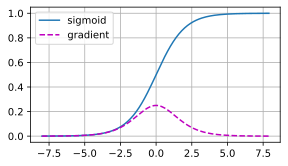

In [4]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

x = tf.Variable(tf.range(-8.0, 8.0, 0.1))
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), [y.numpy(), t.gradient(y, x).numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

As you can see, the sigmoid’s gradient vanishes both when its inputs are large and when they are small.

###Exploding Gradients
The opposite problem, when gradients explode, can be similarly vexing.
To illustrate this a bit better,
we draw 100 Gaussian random matrices
and multiply them with some initial matrix.
For the scale that we picked
(the choice of the variance $\sigma^2=1$),
the matrix product explodes.
When this happens due to the initialization
of a deep network, we have no chance of getting
a gradient descent optimizer to converge.

In [5]:
M = tf.random.normal((4, 4))
print('a single matrix \n', M)
for i in range(100):
    M = tf.matmul(M, tf.random.normal((4, 4)))

print('after multiplying 100 matrices\n', M.numpy())

a single matrix 
 tf.Tensor(
[[-0.7528289   1.7035486   0.33220714  0.32393542]
 [-1.2935843   0.75029206  0.30504182  0.43071356]
 [ 1.609497    1.2684858   0.83508986 -1.0134327 ]
 [ 0.39350313 -1.1339874   0.5044776  -2.2787356 ]], shape=(4, 4), dtype=float32)
after multiplying 100 matrices
 [[-1.87416254e+23 -1.14242902e+23 -1.12996675e+23  1.88301769e+23]
 [-8.67392568e+22 -5.28734846e+22 -5.22966906e+22  8.71490933e+22]
 [-2.53441870e+23 -1.54490040e+23 -1.52804739e+23  2.54639396e+23]
 [-3.81751297e+23 -2.32703623e+23 -2.30164962e+23  3.83555223e+23]]
